In [1]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import arviz as az
import preliz as pz

from ipywidgets import interact
import ipywidgets as ipyw

In [2]:
az.style.use('arviz-white')

In [3]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "False",
              "progress": "False",
              "shortcut": "False",});


<center><img src="img/logo_inst.png" width="750">
<br>
<br>
<br>
<br>
<h1 align="center">Introducción a la probabilidad</h1>



<br>
<br>
<br>
<br>
<br>

## Objetivos

* Lograr una comprensión general de conceptos básicos en probabilidad

## Probabilidades

* Definimos un **espacio de muestreo** $\mathcal{X}$ como el conjunto que contiene todos los posibles resultados de un experimento.
    * Para un dado de 6 caras tenemos: $\mathcal{X} = \{1, 2, 3, 4, 5, 6\}$


* Un evento $A$ es un subconjunto de $\mathcal{X}$.
    * Podríamos tener que $A = \{2\}$
    * O quizá $A = \{1, 3, 5\}$ 


* Un evento $A$ ha ocurrido si el resultado de un experimento es $A$.


* Para indicar la **probabilidad** de un evento $A = \{2\}$ escribimos $P(A=2)$ o de forma resumida $P(A)$. 

## Probabilidades (cont)

<br>


* $P(A)$ es un valor en el intervalo [0, 1]
    * $0 \implies A$ es imposible
    * $1 \implies A$ es seguro

* Una probabilidad total es una cantidad conservada (siempre suma 1)

* Las distribuciones de probabilidad *acomodan* o *distribuyen* probabilidades entre los eventos posibles


* Las distribuciones de probabilidad se dividen comúnmente en dos clases:
    * Discretas
    * Continuas

In [5]:
def dist_dice(α, β):  # plot the pmf of a discrete distribution representing a die
    n = 5
    x = np.arange(0, 6)
    dist_pmf = special.binom(n, x) * (special.beta(x+α, n-x+β) / special.beta(α, β))
    plt.vlines(x, 0, dist_pmf, colors='C0', lw=4);
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('pmf(x)')
    plt.xticks(x, x+1)


interact(dist_dice,
         α=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1),
         β=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='α', max=10.0, min=0.5, step=0.5), FloatSlider(value=…

In [6]:
def beta_scaled(α, β):
    x = np.linspace(0, 1, 130)
    beta = stats.beta(α, β)
    plt.plot(x*6, beta.pdf(x)/6)
    plt.yticks([])
    plt.ylim(0, 1)
    plt.xlabel('x')
    plt.ylabel('pdf(x)')

interact(beta_scaled,
         α=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1),
         β=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1));

interactive(children=(FloatSlider(value=1.0, description='α', max=10.0, min=0.5, step=0.5), FloatSlider(value=…

## Recapitulando

<br>

* Las probabilidades son  números en el intervalo [0, 1]


* Para distribuciones discretas la *suma de las alturas de las barras* debe ser 1


* Para distribuciones continuas el *área total bajo la curva* debe ser 1


* Las distribuciones de probabilidad distribuyen probabilidades entre los eventos posibles

## Probabilidades, círculos y el mundo platónico

<br>

* Las distribuciones de probabilidad tienen fórmulas matemáticas precisas, similares a cómo un círculo tiene una definición matemática precisa.
     * _Un círculo es el conjunto de todos los puntos que son equidistantes de un punto dado, el centro_


* Las distribuciones de probabilidad vienen en familias, cada miembro difiere del resto solo por el valor de sus parámetros.
    * No hay un solo círculo, sino la *familia de círculos* donde cada miembro difiere del resto solo por el valor del parámetro `radio`.



* Ni las distribuciones de probabilidad ni los círculos son objetos aleatorios.


* La aleatoriedad proviene de los experimentos.

In [7]:
def dado(p=None):  # este es un modelo de un dado
    espacio_muestreal = [1, 2, 3, 4, 5, 6]    
    return np.random.choice(espacio_muestreal, p=p)

dado()  # Esto simula la tirada de un dado

2

In [8]:
def experimento(N=10):
    #muestra = [dado() for i in range(N)]
    muestra = [dado(p=[0.2, 0.5, 0.3, 0, 0, 0]) for i in range(N)]

    for i in range(1, 7):
        print(f'{i}: {muestra.count(i)/N:.2g}')
        
experimento()

1: 0
2: 0.7
3: 0.3
4: 0
5: 0
6: 0


## Probabilidad condicional y probabilidad conjunta

<br>
<br>

Dado dos eventos $A$ y $B$ si $P(B) > 0$, la probabilidad de $A$ dado $B$ se define como:

<br>

$$
P(A \mid B) \triangleq \frac{P(A, B)}{P(B)}
$$

<br>

* $P(A, B)$ es la probabilidad conjunta, *i.e.* la probabilidad que tanto el evento $A$ como el $B$ sucedan, a veces se escribe como $P(A \cap B)$

<center>
<img src='img/cond.png' width=700 >
</center>
<br>

* Una probabilidad condicional re-define el espacio muestreal


* Condicionar es el *alma* de la estadística


* Todas las probabilidades son condicionales, aún cuando no se indique explícitamente. Siempre hay conocimiento previo (o suposiciones) incorporado en cada probabilidad

## Variables aleatorias

* Una variable aleatoria es una función que asocia números reales $\mathbb{R}$ con un espacio muestral. 
* Para una tirada de un dado podemos asociar ⚀ con el número 1, ⚁ con el 2, etc.
* Si tuviéramos dos dados podríamos definir una variable aleatoria $S$ como la suma de ambos dados. Por lo que $S$ podría tomar los valores $\{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12\}$
* Si los dados no están trucados la distribución de probabilidad de $S$ sería:

<a href="https://en.wikipedia.org/wiki/File:Dice_Distribution_(bar).svg"><img src='img/dist_dos_dados.png' width=500 ></a>

## Variables aleatorias  (cont)

<br>

* Otra variable aleatoria podría ser $C$ cuyo espacio muestral es $\{rojo, verde, azul\}$.


* Si los eventos de interés fuesen `rojo, verde, azul,` entonces podríamos *codificarlos* como `C(rojo) = 0, C(verde)=1, C(azul)=2`


* Una variable es aleatoria en el sentido de que en cada *experimento* es posible obtener un evento distinto sin que la sucesión de eventos siga un patrón determinista. 
    * La variable NO puede tomar cualquier valor posible, $C$ solo puede tomar 3 valores.
    * *Aleatorio* NO implica que todos los eventos tienen igual probabilidad.

## Distribuciones de probabilidad

<br>

* A una variable aleatoria le podemos asociar una *lista* con la probabilidad de cada evento


* Esa lista se llama distribución de probabilidad


* Si la variable es discreta (como $C$) la distribución de probabilidad se la llama función de masa de probabilidad (o **pmf** por su sigla en inglés).


* Una $pmf$ devuelve probabilidades.

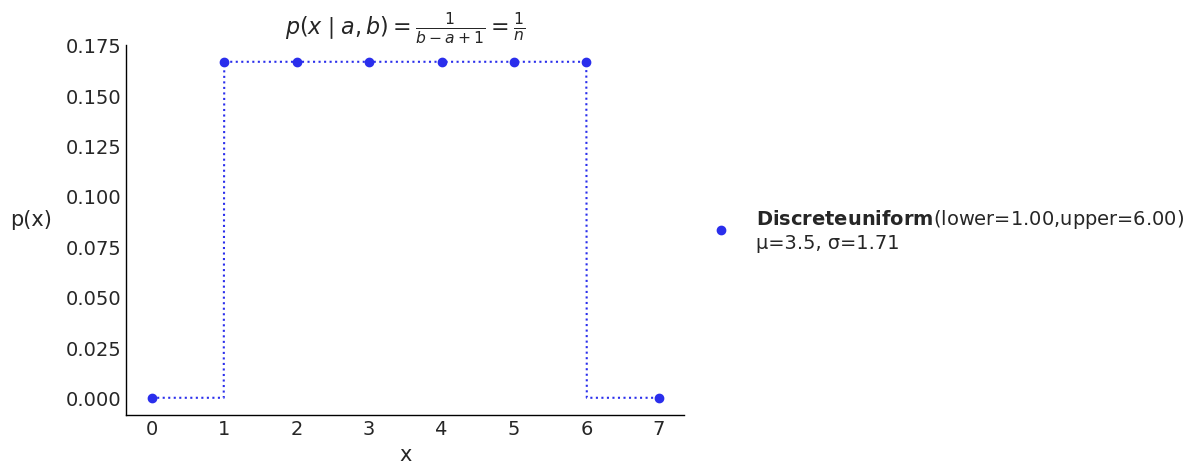

In [9]:
dist = pz.DiscreteUniform(lower=1, upper=6)

ax = dist.plot_pdf(moments="md", support=(0, 7))

ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25)
ax.set_title(r'$p(x \mid a, b)={\frac {1}{b - a + 1}} = \frac{1}{n}$');

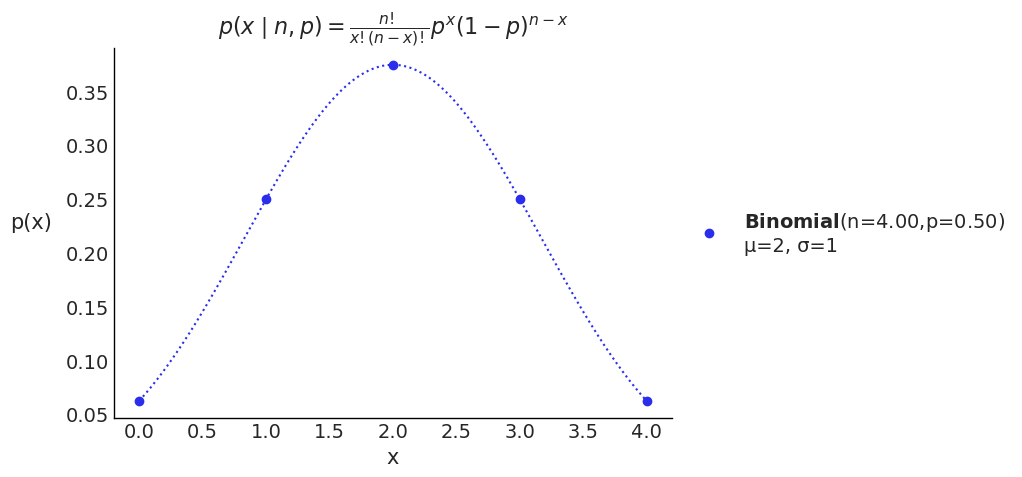

In [10]:
dist = pz.Binomial(n=4, p=0.5)
ax = dist.plot_pdf(moments="md")
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25)
ax.set_title(r'$p(x \mid n,p) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$');

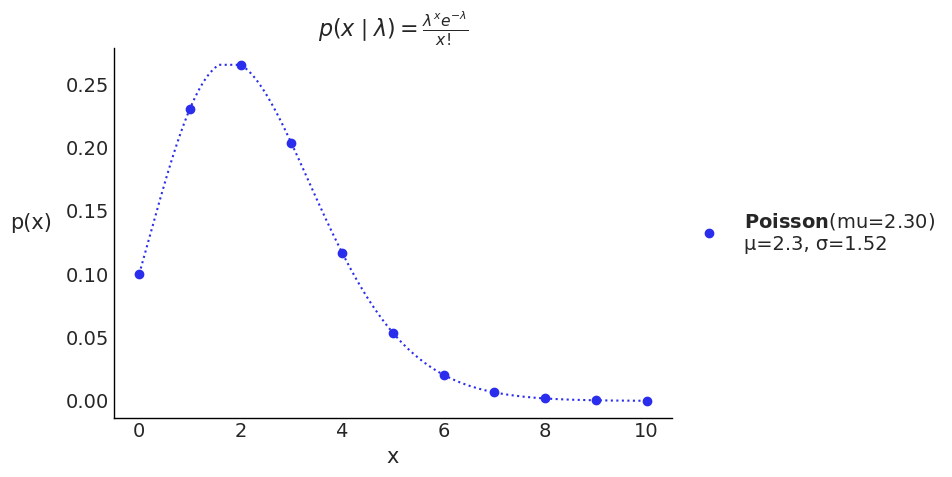

In [11]:
dist = pz.Poisson(mu=2.3)
ax = dist.plot_pdf(moments="md")
ax.set_xlabel('x')
ax.set_ylabel('p(x)', rotation=0, labelpad=25);
ax.set_title(r'$p(x \mid \lambda) = \frac{\lambda^{x} e^{-\lambda}}{x!}$');

## Distribuciones de probabilidad continuas

* Si la variable aleatoria es continua (por ejemplo longitud de onda) la distribución de probabilidad se la llama función de densidad de probabilidad (o **pdf** por su sigla en inglés).
* Una `pdf` devuelve densidades de probabilidad, pero no probabilidades
* Para obtener una probabilidad a partir de una `pdf` es necesario integrar una `pdf`

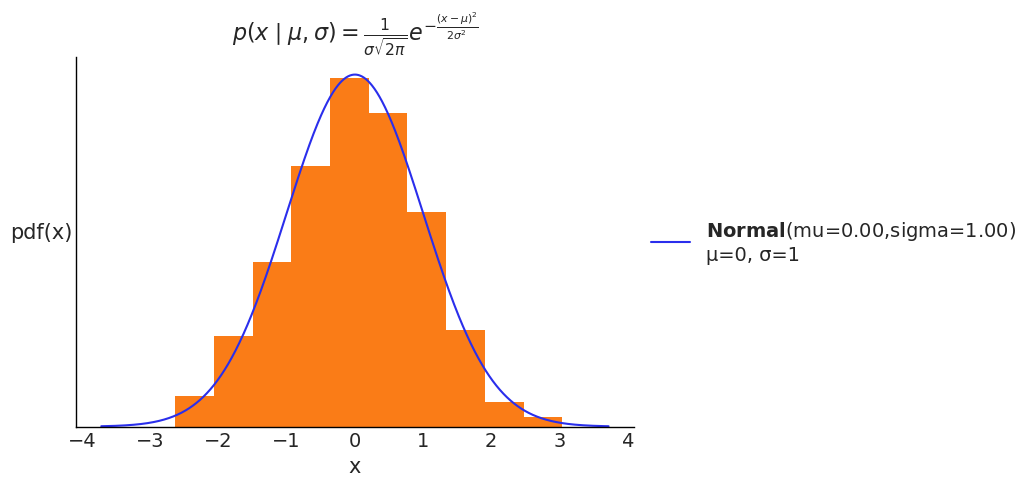

In [12]:
dist = pz.Normal(mu=0, sigma=1)  
x_rvs = dist.rvs(500)
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);
ax.set_title(r'$p(x \mid \mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}} $');

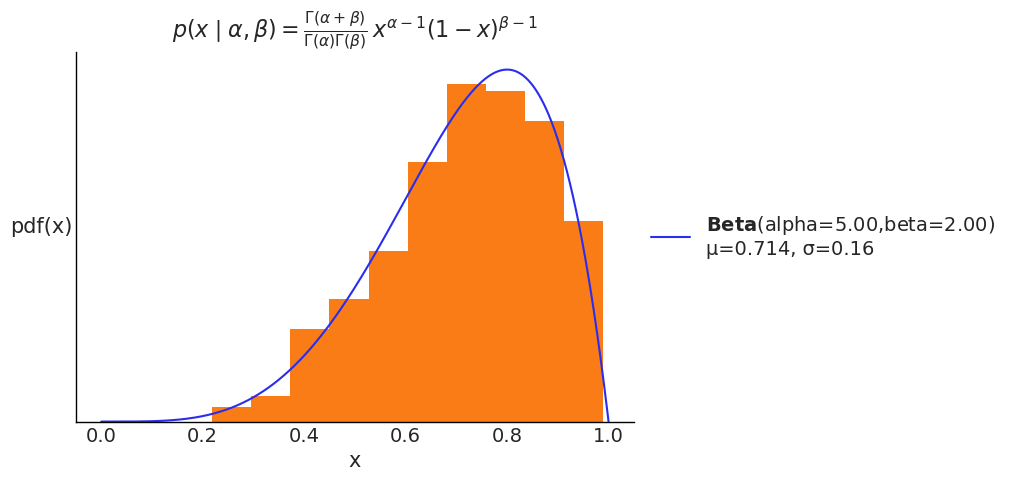

In [13]:
dist = pz.Beta(5, 2)  
x_rvs = dist.rvs(500)  # muestrear 500 valores de la distribución
ax = dist.plot_pdf(moments="md")
ax.hist(x_rvs, density=True)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)', rotation=0, labelpad=25);
ax.set_title(r'$p(x \mid \alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1}$');

### Distribución acumulada


* La función de distribución acumulada (`cdf` en inglés) es una forma alternativa (a la pdf/pmf) de representar distribuciones

* La `cdf` se obtiene al integrar una `pdf`.


<img src='img/cmf_pdf_pmf.png' width=600 >

[Think Stats](http://greenteapress.com/thinkstats2/html/index.html)

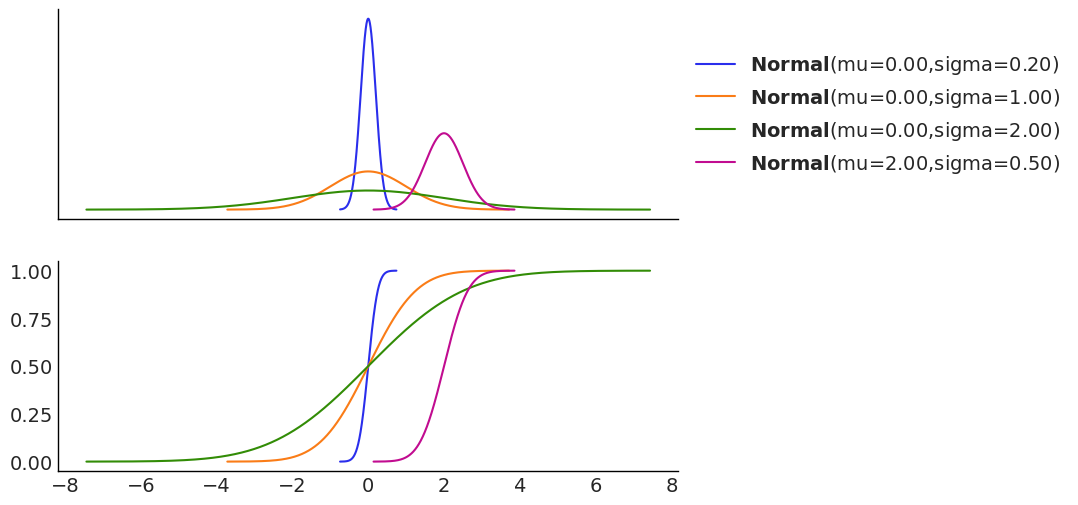

In [14]:
_, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
x_valores = np.linspace(-4, 4, 500)
valores = [(0., .2), (0., 1.), (0., 2.), (2., .5)]
for val in valores:
    pz.Normal(*val).plot_pdf(ax=ax[0])
    pz.Normal(*val).plot_cdf(ax=ax[1])
    ax[1].get_legend().remove()

##  Relación entre probabilidades conjuntas, condicionales y marginales

<br>
<center>
<img src="img/probabilidades.png" width=500>
</center>

* Probabilidad conjunta $p(x, y)$
* Probabilidad marginal $p(x)$ o $p(y)$ 
* Probabilidad condicional $p(x \mid y)$

$$
p(\mathit{X}, \mathit{Y}) = p(\mathit{X} \mid \mathit{Y}) {p(\mathit{Y})}
$$

* $p(\mathit{X} \mid \mathit{Y})$ es una *rebanada* de $p(\mathit{X}, \mathit{Y})$; rebanada que tomamos *a la altura* de $\mathit{Y}$

* Si tomamos todas las rebanadas entonces obtendremos $p(\mathit{X}, \mathit{Y})$


* Para obtener las probabilidades marginales, las que se encuentran en los *márgenes* 😉:

$$
p(\mathit{X}) = \sum_\mathit{Y} p(\mathit{X}, \mathit{Y}) = \sum_\mathit{Y} p(\mathit{X} \mid \mathit{Y}) {p(\mathit{Y})}
$$ 

Cambiando la sumatoria por una integral para distribuciones continuas.

## La ley de los grandes números

<br>


* El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribución. 


* Esto no es cierto para algunas distribuciones como la distribución de Cauchy (la cual no tiene media ni varianza finita).


* La paradoja del apostador se suele justificar con una versión intuitiva (y errada) de la ley de los grandes números.


<br>

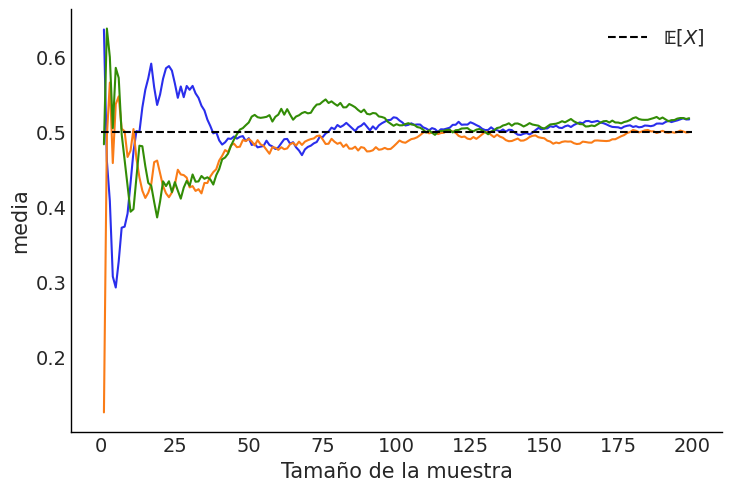

In [15]:
tamaño_muestra = 200
muestras = range(1, tamaño_muestra)
dist = stats.uniform(0, 1)
media_verdadera = dist.stats(moments='m')

for _ in range(3):
    muestra = dist.rvs(tamaño_muestra)
    media_estimada = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, media_estimada, lw=1.5)

plt.hlines(media_verdadera, 0, tamaño_muestra, linestyle='--', color='k', label=r'$\mathbf{\mathbb{E}}[\mathit{X}]$')
plt.legend()
plt.ylabel("media")
plt.xlabel("Tamaño de la muestra");

### El teorema central del límite

* Si tomamos $n$ valores (de forma independiente) de una distribución arbitraria la media $\bar X$ de esos valores se _distribuirá aproximadamente como_ una Gaussiana a medida que ${n \rightarrow \infty}$:

$$
\bar X_n \dot\sim \mathcal{N} \left(\mu,  \frac{\sigma^2}{n}\right)
$$

Donde $\mu$ y $\sigma^2$ son la media y varianza del proceso estudiado (o de la población).

Para que el teorema del límite central se cumpla se deben cumplir los siguientes supuestos:

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribución
1. La media y la desviación estándar de la distribución tiene que ser finitas

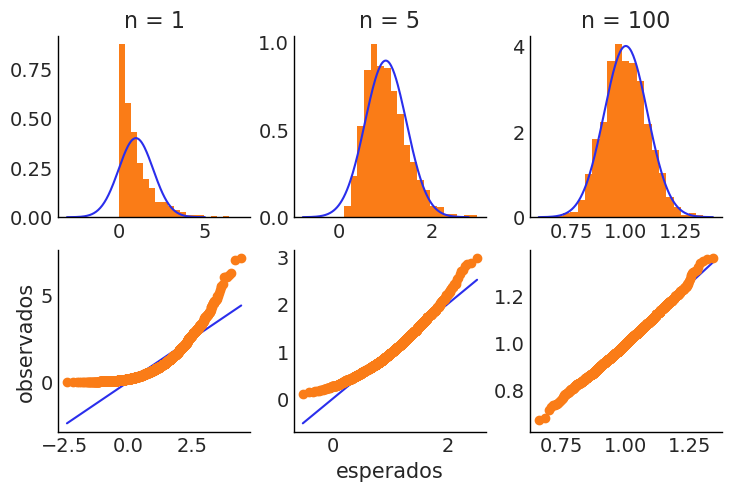

In [16]:
iters = 2000
distri = stats.expon(scale=1)
media, var = distri.stats(moments='mv')

_, ax = plt.subplots(2, 3, constrained_layout=True)

for i, n in enumerate([1, 5, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)

    sd = (var/n)**0.5 
    x = np.linspace(media - 4 * sd, media + 4 * sd, 200)
    ax[0, i].plot(x, stats.norm(media, sd).pdf(x))
    ax[0, i].hist(sample, density=True, bins=20)
    ax[0, i].set_title('n = {}'.format(n))
    osm, osr = stats.probplot(sample, dist=stats.norm(media, sd), fit=False)
    ax[1, i].plot(osm, osm)
    ax[1, i].plot(osm, osr, 'o')
ax[1, 0].set_ylabel('observados')
ax[1, 1].set_xlabel('esperados');

## Para seguir Leyendo

<br>
<br>

* [Probability and Bayesian Modeling](https://bayesball.github.io/BOOK/probability-a-measurement-of-uncertainty.html) de Jim Albert & Jingchen Hu

* [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability-Second-Edition/Blitzstein-Hwang/p/book/9781138369917) de Joseph K. Blitzstein & Jessica Hwang

* [Probability Theory (For Scientists and Engineers)](https://betanalpha.github.io/assets/case_studies/probability_theory.html) de Michael Betancourt

## Ejercicios

1. De las siguientes expresiones cual(es) se corresponde(n) con el enunciado "la probabilidad de lluvia dado que es 25 de Mayo de 1810"?
    * p(lluvia)
    * p(lluvia | mayo)    
    * p(lluvia | 25 de Mayo de 1810)
    * p(25 de Mayo de 1810 | lluvia)
    * p(lluvia, 25 de Mayo de 1810) / p(25 de Mayo de 1810)
    
2. Enuncie con palabras cada una de las expresiones del punto anterior. 

3. Según la definición de probabilidad condicional
    * ¿Cuál es el valor de $P(A \mid A)$?
    * ¿Cuál es la probabilidad de $P(A, B)$?
    * ¿Cuál es la probabilidad de $P(A, B)$ en el caso especial que $A$ y $B$ sean independientes? 
    * ¿Cuándo se cumple que $P(A \mid B) = P(A)$?
    * Es posible que $P(A \mid B) > P(A)$
    * Es posible que $P(A \mid B) < P(A)$


4. $\mathit{X_1}$ y $\mathit{X_2}$ siguen la pmf indicada en la tabla:

| $\mathit{X_1}$  | $\mathit{X_2}$  | $$p(\mathit{X_1}=x_1,\mathit{X_2}=x_2)$$ |
|---|---|---|
| 0 | 0 | 0.15  |
| 1 | 0 | 0.15  |
| 2 | 0 | 0.15  |
| 0 | 1 | 0.15  |
| 1 | 1 | 0.20  |
| 2 | 1 | 0.20  |

    a. Calcule la distribución marginal de X1
    b. Calcule la distribución marginal de X2
    c. Calcule la distribución condicional de X1|X2
    d. Son X1 y X2 independientes? Justifique

Los siguientes ejercicios se deben realizar usando Python (y NumPy, SciPy, Matplotlib)
5. Ilustrar que la distribución de Poisson se aproxima a una binomial con $n >> p$.

6. Para alguna de las distribuciones discretas presentadas en este notebook verificar que la probabilidad total es 1.

7. Para alguna de las distribuciones continuas presentadas en este notebook verificar que el área bajo la curva es 1.

8. Repetir la simulación para la ley de los grandes números para al menos 3 distribuciones de probabilidad. Para cada distribución probar más de un conjunto de parámetros.

9. Repetir la simulación para el teorema central del límite para al menos 3 distribuciones de probabilidad. Para cada distribución probar más de un conjunto de parámetros.